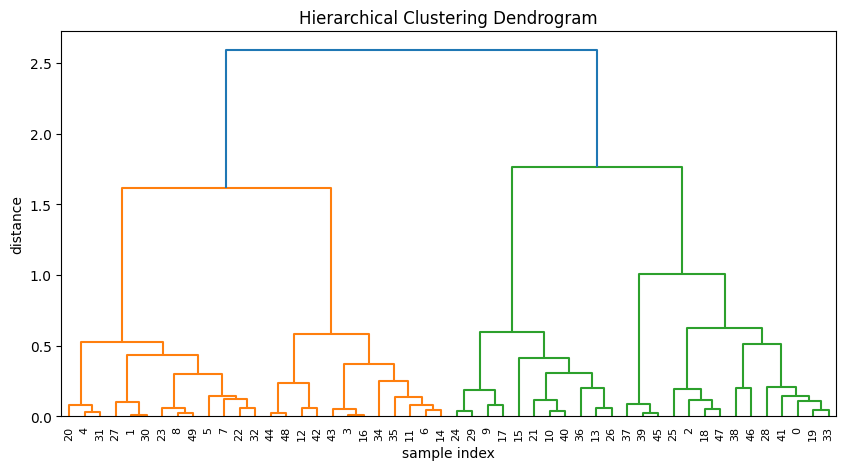

In [3]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# 임의의 2차원 데이터 생성
X = np.random.rand(50,2)

# 계층적 군집화 수행 (여기서는 와드 연결법 사용)
Z = linkage(X, 'ward')

# Dendrogram 그리기
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

plt.show()

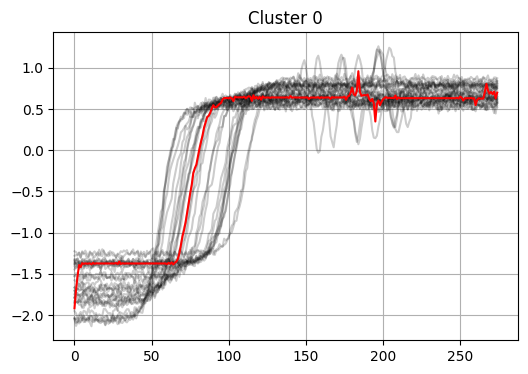

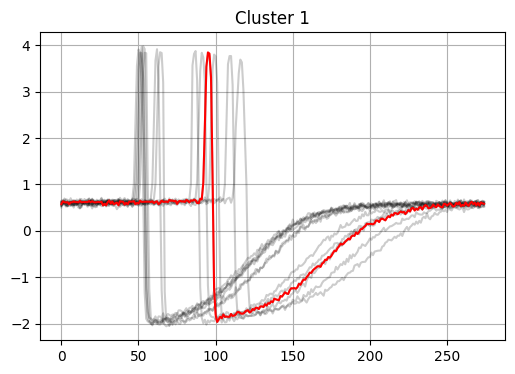

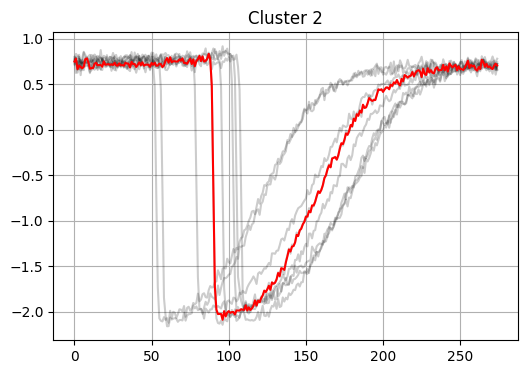

In [5]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt

# 데이터 로드 및 전처리
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])  # 50개만 사용하겠습니다.

# K-means 모델 설정 (DTW 거리를 사용)
km = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5, random_state=0)

# 군집화 수행
y_pred = km.fit_predict(X_train)

# 결과 시각화
for yi in range(3):
    plt.figure(figsize=(6,4))
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.title(f"Cluster {yi}")
    plt.grid(True)
    plt.show()

In [6]:
import pandas as pd

In [64]:
data1 = pd.read_csv('./datasets/사업보고서_연결.csv', encoding='cp949')
data2 = pd.read_csv('./datasets/사업보고서_개별.csv', encoding='cp949')
data3 = pd.read_csv('./datasets/사업보고서_GAAP.csv', encoding='cp949')

In [92]:
data1['회계년도'].unique()

array(['2003/12', '2004/12', '2005/12', '2006/12', '2007/12', '2008/12',
       '2009/12', '2010/12', '2011/12', '2012/12', '2013/12', '2014/12',
       '2015/12', '2016/12', '2017/12', '2018/12', '2019/12', '2020/12',
       '2021/12', '2022/12', '2003/06', '2004/06', '2005/06', '2003/11',
       '2004/11', '2003/09', '2004/09', '2005/09', '2006/09', '2007/09',
       '2008/09', '2009/09', '2010/09', '2011/09', '2012/09', '2013/09',
       '2014/09', '2015/09', '2016/09', '2017/09', '2018/09', '2019/09',
       '2020/09', '2021/09', '2022/09', '2003/03', '2004/03', '2005/03',
       '2006/03', '2007/03', '2008/03', '2009/03', '2010/03', '2011/03',
       '2012/03', '2013/03', '2014/03', '2015/03', '2016/03', '2017/03',
       '2006/06', '2007/06', '2008/06', '2009/06', '2010/06', '2011/06',
       '2012/06', '2013/06', '2014/06', '2015/06', '2016/06', '2017/06',
       '2018/06', '2019/06', '2020/06', '2021/06', '2022/06', '2018/03',
       '2019/03', '2020/03', '2021/03', '2022/03', 

In [68]:
df

,회사명,거래소코드,회계년도,정상영업이익증가율(IFRS연결),순이익증가율(IFRS연결),1주당순이익(IFRS연결)(원),부채비율(IFRS연결),매출액정상영업이익률(IFRS연결),PER(최고)(IFRS),PER(최저)(IFRS),PBR(최고)(IFRS),PBR(최저)(IFRS),PCR(최고)(IFRS),PCR(최저)(IFRS)
0,(주)DB하이텍,990,2003/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(주)DB하이텍,990,2004/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(주)DB하이텍,990,2005/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(주)DB하이텍,990,2006/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(주)DB하이텍,990,2007/12,0.0,0.00,-1151.0,319.30,-2.62,0.00,0.00,1.11,0.39,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13727,흥아해운(주),3280,2018/12,0.0,0.00,-514.0,998.73,-4.99,0.00,0.00,2.97,1.09,0.00,0.00
13728,흥아해운(주),3280,2019/12,0.0,0.00,-391.0,1293.83,-12.10,0.00,0.00,7.85,1.93,0.00,0.00
13729,흥아해운(주),3280,2020/12,0.0,0.00,-440.0,0.00,-6.52,0.00,0.00,0.00,0.00,0.00,0.00
13730,흥아해운(주),3280,2021/12,0.0,0.00,118.0,140.24,-2.29,84.63,2.95,12.35,0.43,0.00,0.00


In [67]:
df = data1.copy()
# df = data1.set_index('회계년도')
df = df.drop(['2003/12', '2004/12', '2005/12', '2006/12'], axis=1)

KeyError: "['2003/12', '2004/12', '2005/12', '2006/12'] not found in axis"

In [46]:
df2 = data2.copy()
# df2 = data2.set_index('회계년도')
df2 = df2.drop(['2003/12', '2004/12', '2005/12', '2006/12'], axis=1)

In [49]:
df.isna().sum()

회사명                      0
거래소코드                    0
정상영업이익증가율(IFRS연결)     2782
순이익증가율(IFRS연결)        2782
1주당순이익(IFRS연결)(원)     2782
부채비율(IFRS연결)          2782
매출액정상영업이익률(IFRS연결)    2782
PER(최고)(IFRS)          640
PER(최저)(IFRS)          640
PBR(최고)(IFRS)          640
PBR(최저)(IFRS)          640
PCR(최고)(IFRS)          640
PCR(최저)(IFRS)          640
dtype: int64

In [51]:
df['정상영업이익증가율(IFRS연결)'].fillna(df2['정상영업이익증가율(IFRS)'], inplace=True)

,회사명,거래소코드,정상영업이익증가율(IFRS연결),순이익증가율(IFRS연결),1주당순이익(IFRS연결)(원),부채비율(IFRS연결),매출액정상영업이익률(IFRS연결),PER(최고)(IFRS),PER(최저)(IFRS),PBR(최고)(IFRS),PBR(최저)(IFRS),PCR(최고)(IFRS),PCR(최저)(IFRS)
회계년도,,,,,,,,,,,,,
2007/12,(주)DB하이텍,990,0.0,0.00,-1151.0,319.30,-2.62,0.00,0.00,1.11,0.39,0.00,0.00
2008/12,(주)DB하이텍,990,0.0,0.00,-8904.0,342.61,1.80,0.00,0.00,0.57,0.13,0.00,0.00
2009/12,(주)DB하이텍,990,0.0,0.00,-5481.0,348.79,-11.01,0.00,0.00,0.81,0.20,5.02,1.24
2010/12,(주)DB하이텍,990,0.0,0.00,-5072.0,247.03,-61.04,0.00,0.00,1.71,0.72,9.28,3.88
2011/12,(주)DB하이텍,990,0.0,0.00,-2541.0,289.22,-7.81,0.00,0.00,3.66,1.21,13.09,4.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018/12,흥아해운(주),3280,0.0,0.00,-514.0,998.73,-4.99,0.00,0.00,2.97,1.09,0.00,0.00
2019/12,흥아해운(주),3280,0.0,0.00,-391.0,1293.83,-12.10,0.00,0.00,7.85,1.93,0.00,0.00
2020/12,흥아해운(주),3280,0.0,0.00,-440.0,0.00,-6.52,0.00,0.00,0.00,0.00,0.00,0.00


In [50]:
df2.isna().sum()

회사명                   0
거래소코드                 0
정상영업이익증가율(IFRS)     640
순이익증가율(IFRS)        640
1주당순이익(IFRS)(원)     640
부채비율(IFRS)          640
매출액정상영업이익률(IFRS)    640
dtype: int64

In [52]:
df2

,회사명,거래소코드,정상영업이익증가율(IFRS),순이익증가율(IFRS),1주당순이익(IFRS)(원),부채비율(IFRS),매출액정상영업이익률(IFRS)
회계년도,,,,,,,
2007/12,(주)DB하이텍,990,0.0,0.0,-682.0,263.15,-1.11
2008/12,(주)DB하이텍,990,0.0,0.0,-8646.0,287.47,-6.57
2009/12,(주)DB하이텍,990,0.0,0.0,-5361.0,288.09,-11.31
2010/12,(주)DB하이텍,990,0.0,0.0,-5435.0,261.80,-61.14
2011/12,(주)DB하이텍,990,0.0,0.0,-2414.0,305.87,-7.48
...,...,...,...,...,...,...,...
2018/12,흥아해운(주),3280,0.0,0.0,-576.0,1279.81,-5.76
2019/12,흥아해운(주),3280,0.0,0.0,-400.0,2092.30,-15.15
2020/12,흥아해운(주),3280,0.0,0.0,-323.0,0.00,-4.95


In [53]:
df['정상영업이익증가율(IFRS연결)'].fillna(df2['정상영업이익증가율(IFRS)'], inplace=True)
df['순이익증가율(IFRS연결)'].fillna(df2['순이익증가율(IFRS)'], inplace=True)
df['1주당순이익(IFRS연결)(원)'].fillna(df2['1주당순이익(IFRS)(원)'], inplace=True)
df['부채비율(IFRS연결)'].fillna(df2['부채비율(IFRS)'], inplace=True)
df['매출액정상영업이익률(IFRS연결)'].fillna(df2['매출액정상영업이익률(IFRS)'], inplace=True)

In [59]:
df.isna().sum()

회사명                     0
거래소코드                   0
정상영업이익증가율(IFRS연결)     627
순이익증가율(IFRS연결)        627
1주당순이익(IFRS연결)(원)     627
부채비율(IFRS연결)          627
매출액정상영업이익률(IFRS연결)    627
PER(최고)(IFRS)         640
PER(최저)(IFRS)         640
PBR(최고)(IFRS)         640
PBR(최저)(IFRS)         640
PCR(최고)(IFRS)         640
PCR(최저)(IFRS)         640
dtype: int64

In [60]:
df

,회사명,거래소코드,정상영업이익증가율(IFRS연결),순이익증가율(IFRS연결),1주당순이익(IFRS연결)(원),부채비율(IFRS연결),매출액정상영업이익률(IFRS연결),PER(최고)(IFRS),PER(최저)(IFRS),PBR(최고)(IFRS),PBR(최저)(IFRS),PCR(최고)(IFRS),PCR(최저)(IFRS)
회계년도,,,,,,,,,,,,,
2007/12,(주)DB하이텍,990,0.0,0.00,-1151.0,319.30,-2.62,0.00,0.00,1.11,0.39,0.00,0.00
2008/12,(주)DB하이텍,990,0.0,0.00,-8904.0,342.61,1.80,0.00,0.00,0.57,0.13,0.00,0.00
2009/12,(주)DB하이텍,990,0.0,0.00,-5481.0,348.79,-11.01,0.00,0.00,0.81,0.20,5.02,1.24
2010/12,(주)DB하이텍,990,0.0,0.00,-5072.0,247.03,-61.04,0.00,0.00,1.71,0.72,9.28,3.88
2011/12,(주)DB하이텍,990,0.0,0.00,-2541.0,289.22,-7.81,0.00,0.00,3.66,1.21,13.09,4.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018/12,흥아해운(주),3280,0.0,0.00,-514.0,998.73,-4.99,0.00,0.00,2.97,1.09,0.00,0.00
2019/12,흥아해운(주),3280,0.0,0.00,-391.0,1293.83,-12.10,0.00,0.00,7.85,1.93,0.00,0.00
2020/12,흥아해운(주),3280,0.0,0.00,-440.0,0.00,-6.52,0.00,0.00,0.00,0.00,0.00,0.00


In [58]:
df.dropna()

,회사명,거래소코드,정상영업이익증가율(IFRS연결),순이익증가율(IFRS연결),1주당순이익(IFRS연결)(원),부채비율(IFRS연결),매출액정상영업이익률(IFRS연결),PER(최고)(IFRS),PER(최저)(IFRS),PBR(최고)(IFRS),PBR(최저)(IFRS),PCR(최고)(IFRS),PCR(최저)(IFRS)
회계년도,,,,,,,,,,,,,
2007/12,(주)DB하이텍,990,0.0,0.00,-1151.0,319.30,-2.62,0.00,0.00,1.11,0.39,0.00,0.00
2008/12,(주)DB하이텍,990,0.0,0.00,-8904.0,342.61,1.80,0.00,0.00,0.57,0.13,0.00,0.00
2009/12,(주)DB하이텍,990,0.0,0.00,-5481.0,348.79,-11.01,0.00,0.00,0.81,0.20,5.02,1.24
2010/12,(주)DB하이텍,990,0.0,0.00,-5072.0,247.03,-61.04,0.00,0.00,1.71,0.72,9.28,3.88
2011/12,(주)DB하이텍,990,0.0,0.00,-2541.0,289.22,-7.81,0.00,0.00,3.66,1.21,13.09,4.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018/12,흥아해운(주),3280,0.0,0.00,-514.0,998.73,-4.99,0.00,0.00,2.97,1.09,0.00,0.00
2019/12,흥아해운(주),3280,0.0,0.00,-391.0,1293.83,-12.10,0.00,0.00,7.85,1.93,0.00,0.00
2020/12,흥아해운(주),3280,0.0,0.00,-440.0,0.00,-6.52,0.00,0.00,0.00,0.00,0.00,0.00


In [61]:
df.to_csv('사업보고서_개별+연결.csv', encoding='cp949')

In [84]:
dfdf = pd.read_csv('사업보고서_개별+연결.csv', encoding='cp949')

In [91]:
dfdf['회계년도'].unique()

array(['2007/12', '2008/12', '2009/12', '2010/12', '2011/12', '2012/12',
       '2013/12', '2014/12', '2015/12', '2016/12', '2017/12', '2018/12',
       '2019/12', '2020/12', '2021/12', '2022/12', '2003/06', '2004/06',
       '2005/06', '2003/11', '2004/11', '2003/09', '2004/09', '2005/09',
       '2006/09', '2007/09', '2008/09', '2009/09', '2010/09', '2011/09',
       '2012/09', '2013/09', '2014/09', '2015/09', '2016/09', '2017/09',
       '2018/09', '2019/09', '2020/09', '2021/09', '2022/09', '2003/03',
       '2004/03', '2005/03', '2006/03', '2007/03', '2008/03', '2009/03',
       '2010/03', '2011/03', '2012/03', '2013/03', '2014/03', '2015/03',
       '2016/03', '2017/03', '2006/06', '2007/06', '2008/06', '2009/06',
       '2010/06', '2011/06', '2012/06', '2013/06', '2014/06', '2015/06',
       '2016/06', '2017/06', '2018/06', '2019/06', '2020/06', '2021/06',
       '2022/06', '2018/03', '2019/03', '2020/03', '2021/03', '2022/03',
       '2023/03', '2005/11', '2006/11', '2007/11', 

In [86]:
dfdf.drop('회사명', axis=1, inplace=True)

In [93]:
df5 = dfdf.groupby('회계년도').mean()

In [96]:
df5 = df5.drop('거래소코드', axis=1)

In [98]:
df5.dropna(inplace=True)

In [99]:
df5

,정상영업이익증가율(IFRS연결),순이익증가율(IFRS연결),1주당순이익(IFRS연결)(원),부채비율(IFRS연결),매출액정상영업이익률(IFRS연결),PER(최고)(IFRS),PER(최저)(IFRS),PBR(최고)(IFRS),PBR(최저)(IFRS),PCR(최고)(IFRS),PCR(최저)(IFRS)
회계년도,,,,,,,,,,,
2007/03,0.000000,0.000000,1220.333333,129.393810,8.933333,38.313333,16.700000,2.467619,1.050000,20.619524,8.855714
2007/06,0.000000,0.000000,3651.600000,78.354000,5.352000,15.450000,6.428000,0.996000,0.438000,7.668000,3.308000
2007/09,0.000000,0.000000,4802.875000,85.298750,2.628750,26.731250,15.047500,2.120000,0.978750,6.395000,2.642500
2007/11,0.000000,0.000000,3526.000000,20.150000,6.090000,14.640000,6.510000,1.420000,0.630000,22.980000,10.230000
2007/12,0.000000,0.000000,3609.450909,142.002655,4.265782,40.295345,15.918891,5.162782,0.952491,53.167855,27.053673
...,...,...,...,...,...,...,...,...,...,...,...
2022/06,0.028333,60.291667,-2651.666667,77.616667,-3.295000,12.838333,6.023333,1.500000,0.640000,21.460000,9.576667
2022/09,-33.085000,-12.375000,-8093.000000,80.615000,0.690000,19.335000,9.135000,1.215000,0.610000,354.845000,167.665000
2022/11,0.000000,0.000000,-6.000000,109.300000,4.900000,0.000000,0.000000,3.370000,1.770000,19.820000,10.410000


In [100]:
zero_count = (df5 == 0).sum()

In [104]:
column_list = list(df5.columns)

In [105]:
(column_list)

['정상영업이익증가율(IFRS연결)',
 '순이익증가율(IFRS연결)',
 '1주당순이익(IFRS연결)(원)',
 '부채비율(IFRS연결)',
 '매출액정상영업이익률(IFRS연결)',
 'PER(최고)(IFRS)',
 'PER(최저)(IFRS)',
 'PBR(최고)(IFRS)',
 'PBR(최저)(IFRS)',
 'PCR(최고)(IFRS)',
 'PCR(최저)(IFRS)']

In [101]:
zero_count

정상영업이익증가율(IFRS연결)     12
순이익증가율(IFRS연결)        12
1주당순이익(IFRS연결)(원)      0
부채비율(IFRS연결)           0
매출액정상영업이익률(IFRS연결)     0
PER(최고)(IFRS)          5
PER(최저)(IFRS)          5
PBR(최고)(IFRS)          0
PBR(최저)(IFRS)          0
PCR(최고)(IFRS)          7
PCR(최저)(IFRS)          7
dtype: int64

In [108]:
df6 = df5.loc[(df5 != 0).all(axis=1), :]

In [111]:
df6

,정상영업이익증가율(IFRS연결),순이익증가율(IFRS연결),1주당순이익(IFRS연결)(원),부채비율(IFRS연결),매출액정상영업이익률(IFRS연결),PER(최고)(IFRS),PER(최저)(IFRS),PBR(최고)(IFRS),PBR(최저)(IFRS),PCR(최고)(IFRS),PCR(최저)(IFRS)
회계년도,,,,,,,,,,,
2008/03,15.186842,28.561053,1651.578947,116.412632,8.817368,99.457368,34.447368,3.837368,1.231053,24.014211,11.339474
2008/06,17.802000,52.262000,4091.000000,98.926000,5.246000,19.776000,4.840000,1.466000,0.542000,39.182000,8.204000
2008/09,8.236000,242.572000,6418.600000,51.670000,-1.000000,18.554000,12.630000,1.332000,0.540000,10.946000,7.192000
2008/12,55.371825,62.658980,2273.767442,179.526172,3.940841,38.039267,8.411324,2.799088,0.527835,32.439821,9.062612
2009/03,-5.226667,2.910556,1001.000000,134.856111,6.538889,11.945000,3.387778,2.074444,0.492778,14.978333,4.022222
...,...,...,...,...,...,...,...,...,...,...,...
2021/12,92.077473,112.554945,4996.327568,135.764180,2.820123,47.141341,22.102490,3.062367,1.344938,67.938440,32.844569
2022/03,-10.672500,34.932500,519.750000,173.907500,0.257500,13.207500,6.810000,1.540000,0.750000,62.480000,32.287500
2022/06,0.028333,60.291667,-2651.666667,77.616667,-3.295000,12.838333,6.023333,1.500000,0.640000,21.460000,9.576667


In [112]:
pd.read_csv('./datasets/kospi_사업.csv')

,Unnamed: 0,회사명,거래소코드,회계년도,정상영업이익증가율,순이익증가율,1주당순이익,부채비율,매출액정상영업이익률,매출액증가율,PER,PBR,PCR
0,12,(주)DB하이텍,990,2007/12,0.00,0.00,-1151.0,319.30,-2.62,0.00,0.000,0.750,0.000
1,13,(주)DB하이텍,990,2008/12,0.00,0.00,-8904.0,342.61,1.80,28.57,0.000,0.350,0.000
2,14,(주)DB하이텍,990,2009/12,0.00,0.00,-5481.0,348.79,-11.01,-34.26,0.000,0.505,3.130
3,15,(주)DB하이텍,990,2010/12,0.00,0.00,-5072.0,247.03,-61.04,-49.85,0.000,1.215,6.580
4,16,(주)DB하이텍,990,2011/12,0.00,0.00,-2541.0,289.22,-7.81,-10.94,0.000,2.435,8.705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2824,효성첨단소재(주),298050,2022/12,-27.95,-50.00,28053.0,267.04,8.20,6.77,9.525,3.070,8.875
2416,2826,효성티앤씨(주),298020,2019/12,158.22,338.18,21569.0,453.10,5.40,78.12,359.480,2.000,5.120
2417,2827,효성티앤씨(주),298020,2020/12,-17.45,46.96,31698.0,294.79,5.16,-13.73,10.240,1.375,3.240
2418,2828,효성티앤씨(주),298020,2021/12,434.08,463.14,178503.0,156.66,16.56,66.54,9.165,4.770,12.370
